# Basket Analysis

In [2]:
# Bibliotecas requeridas
import sys
sys.path.append('../scr/')

import warnings
warnings.filterwarnings('ignore')

import loadAndTransformData as ltd
import viewDataFunctions as vdf
import basketAnalysis as ba

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import ParameterGrid

In [3]:
# Cargar los datos
ruta_archivo = '../data/processed/Minimarket_Sales_Data_Transform_By_Subcategory.csv'
datos = ltd.cargar_csv(ruta_archivo)

# Convertir tipo de datos a bool
datos = ltd.convertir_a_bool(datos)

Archivo cargado correctamente.


In [55]:
# Crear un grid de parámetros para probar
parametros_grid = list(ParameterGrid({
    'soporte_minimo': [0.05],
    'confianza_minima': [0.05]
}))

# Calibrar Apriori
mejor_configuracion_apriori, mejores_reglas_apriori, itemsets_frecuentes_apriori = ba.calibrar_apriori(datos, parametros_grid)

In [57]:
# Mostrar la mejor configuración para Apriori
print("Mejor configuración Apriori:")
mejor_configuracion_apriori

Mejor configuración Apriori:


{'confianza_minima': 0.05, 'soporte_minimo': 0.05}

In [59]:
# Mostrar frecuencia de items
itemsets_frecuentes_apriori.sort_values(by='support', ascending=False)

,support,itemsets
14,0.232855,(Tissue)
12,0.156915,(Otros)
2,0.149861,(Detergentes)
3,0.142602,(Empaques)
10,0.113667,(Leches Larga Vida)
7,0.094088,(Jabonería)
9,0.086599,(Lavaplatos)
0,0.085832,(Blanqueador)
1,0.078266,(Cuidado De Prendas)
4,0.076707,(Familiar)


In [61]:
# Mostrar el top 10 de reglas de Apriori
mejores_reglas_apriori.sort_values(by='lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Jabonería),(Tissue),0.094088,0.232855,0.052322,0.556099,2.388173,0.030413,1.728188,0.641640
3,(Tissue),(Jabonería),0.232855,0.094088,0.052322,0.224698,2.388173,0.030413,1.168464,0.757706
0,(Detergentes),(Tissue),0.149861,0.232855,0.064182,0.428279,1.839249,0.029286,1.341817,0.536735
1,(Tissue),(Detergentes),0.232855,0.149861,0.064182,0.275631,1.839249,0.029286,1.173628,0.594803


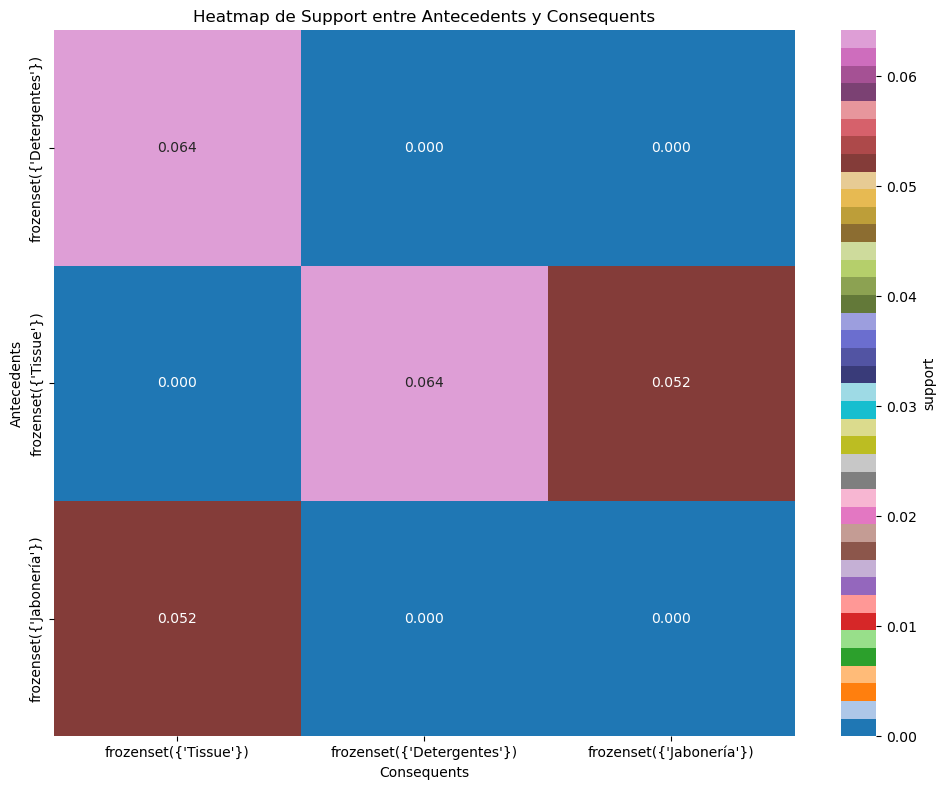

In [65]:
fig=vdf.crear_heatmap_asociacion(mejores_reglas_apriori)